<a href="https://colab.research.google.com/github/hamednasr/TensorFlow-Projects/blob/main/potato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Model to Detect Potato Diseases
### according to 1000 images of "Early blight" and 1000 images of "late blight" and 152 images of "healthy" potatoes, a deep learning model is created and trained then deployed.

In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import mixed_precision
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Wed Sep 21 08:03:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
mixed_precision.set_global_policy('mixed_float16')
mixed_precision.global_policy()

<Policy "mixed_float16">

# Create Image Dataset:

In [5]:
potato_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Computer Vision/potato disease/data',
                                                    labels='inferred',
                                                    label_mode='int',
                                                    batch_size=32,
                                                    image_size=(256, 256),
                                                    shuffle=True)

Found 2152 files belonging to 3 classes.


In [6]:
classes = potato_ds.class_names
classes

['Early_blight', 'Late_blight', 'healthy']

In [7]:
len(potato_ds)

68

In [8]:
for images, labels in potato_ds.take(1):
  print(images.shape)
  print(labels)

(32, 256, 256, 3)
tf.Tensor([1 0 1 0 2 1 1 0 1 0 1 1 0 0 1 0 0 2 0 2 1 1 1 1 0 1 1 1 1 0 0 0], shape=(32,), dtype=int32)


# Visualizing Images:

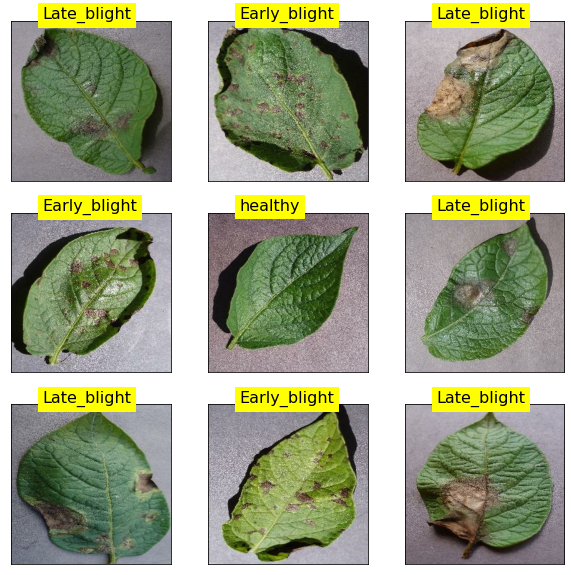

In [9]:
fig , axs = plt.subplots(3,3,figsize=(10,10))

for  i, ax in enumerate(axs.flatten()):
  ax.imshow(images[i]/255)
  itemname = classes[labels[i]]
  ax.text(50, -3, itemname, fontsize=16 ,backgroundcolor='yellow')
  ax.set_xticks([])
  ax.set_yticks([]);

# Train, Val, Test Split:

In [10]:
def train_val_test_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = train_val_test_split(potato_ds)

In [12]:
train_ds = train_ds.shuffle(200).prefetch(tf.data.AUTOTUNE).cache()
val_ds = val_ds.shuffle(200).prefetch(tf.data.AUTOTUNE).cache()
test_ds = test_ds.shuffle(200).prefetch(tf.data.AUTOTUNE).cache()

In [13]:
train_ds

<CacheDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

In [44]:
for images, labels in test_ds:
  print(images.shape)
  print(labels)

(32, 256, 256, 3)
tf.Tensor([0 1 1 1 1 0 0 1 2 1 0 0 0 2 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 2 1 0 2 2 1 0 1 1 0 0 0 1 1], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 2 0 1 0 0 1 2 0 2 0 0 0 0], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 1 0 1 1 0 1 2 0 0 0 0 1 1 1 0 0 1 1 0 0 2 0 1 0 0 1 0 0 1 1 0], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([1 1 1 2 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 2 1 0 0 1 1 0 0], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0 1 0 0 0 0 2 0 0 0 1 1 0 1 0 1 0 1 2 1 1 1 0 2 0 1 1 0 1 1 0], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([1 0 2 1 1 0 0 1 1 0 0 0 2 1 1 0 0 2 0 0 0 0 1 0 0 1 1 0 0 0 1 1], shape=(32,), dtype=int32)


# Data Augmentation:

In [81]:
data_augmentation = tf.keras.Sequential([
                    tf.keras.layers.Resizing(256,256),
                    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
                    tf.keras.layers.RandomRotation(0.1),
                    tf.keras.layers.RandomZoom(0.1),
                    tf.keras.layers.RandomContrast(0.1)],
                    name ="data_augmentation"
                    )

# Create Model:

In [82]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False , pooling='max')
base_model.trainable = False

inputs = tf.keras.Input(shape=(256,256,3), name='input_layer')

x = data_augmentation(inputs)
x = base_model(x, training = False)

x = tf.keras.layers.Dense(32 , activation ='relu')(x)
x = tf.keras.layers.Dense(3)(x)

outputs = tf.keras.layers.Activation('softmax', dtype = tf.float32)(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf .keras. optimizers.Adam(),
              metrics = ['accuracy'])

In [83]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 256, 256, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dense_20 (Dense)            (None, 32)                40992     
                                                                 
 dense_21 (Dense)            (None, 3)                 99        
                                                                 
 activation_10 (Activation)  (None, 3)                 0         
                                                          

In [84]:
for layer in model.layers:
  print(layer.name, layer.dtype , layer.dtype_policy)

input_layer float32 <Policy "float32">
data_augmentation float32 <Policy "mixed_float16">
efficientnetb0 float32 <Policy "mixed_float16">
dense_20 float32 <Policy "mixed_float16">
dense_21 float32 <Policy "mixed_float16">
activation_10 float32 <Policy "float32">


# Train Model:

In [85]:
histoty = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
54/54 [==============================] - 11s 91ms/step - loss: 1.0367 - accuracy: 0.7176 - val_loss: 0.2296 - val_accuracy: 0.9167
Epoch 2/20
54/54 [==============================] - 3s 65ms/step - loss: 0.2329 - accuracy: 0.9109 - val_loss: 0.1499 - val_accuracy: 0.9375
Epoch 3/20
54/54 [==============================] - 3s 65ms/step - loss: 0.1677 - accuracy: 0.9358 - val_loss: 0.1782 - val_accuracy: 0.9323
Epoch 4/20
54/54 [==============================] - 4s 65ms/step - loss: 0.1458 - accuracy: 0.9485 - val_loss: 0.0794 - val_accuracy: 0.9740
Epoch 5/20
54/54 [==============================] - 4s 66ms/step - loss: 0.1158 - accuracy: 0.9606 - val_loss: 0.0490 - val_accuracy: 0.9844
Epoch 6/20
54/54 [==============================] - 4s 65ms/step - loss: 0.1030 - accuracy: 0.9635 - val_loss: 0.0541 - val_accuracy: 0.9844
Epoch 7/20
54/54 [==============================] - 4s 65ms/step - loss: 0.0730 - accuracy: 0.9740 - val_loss: 0.0510 - val_accuracy: 0.9844
Epoch 8/20
5

# Save Model:

In [ ]:
model.save('model.h5')

# Evaluate Model:

In [87]:
model.evaluate(test_ds)

8/8 [==============================] - 1s 67ms/step - loss: 0.0294 - accuracy: 0.9883


[0.02940945513546467, 0.98828125]

In [95]:
pred_prob = np.max(model.predict(test_ds), axis=1)

In [119]:
pred_labels = np.argmax(model.predict(test_ds), axis=1)
pred_labels[:9]

array([0, 1, 1, 1, 1, 0, 0, 1, 2])

## Visualize Prediction:

In [112]:
%pprint

Pretty printing has been turned OFF


In [114]:
labels = []
for image, label in test_ds.unbatch():
  labels.append(label.numpy())
labels[:10]

[0, 1, 1, 1, 1, 0, 0, 1, 2, 1]

In [117]:
images = []
for image, label in test_ds.unbatch():
  images.append(image.numpy())

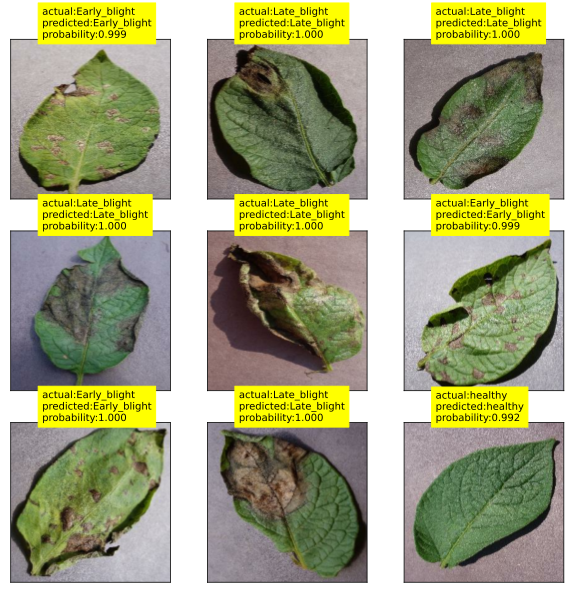

In [118]:
fig , axs = plt.subplots(3,3,figsize=(10,10))

for  i, ax in enumerate(axs.flatten()):
  ax.imshow(images[i]/255)
  itemname = classes[labels[i]]
  predname = classes[pred_labels[i]]
  prob = pred_prob[i]
  ax.text(50, -3, f'actual:{itemname}\npredicted:{predname}\nprobability:{prob:.3f}', fontsize=10 ,backgroundcolor='yellow')
  ax.set_xticks([])
  ax.set_yticks([]);

## Confusion Matrix:

In [121]:
cm = confusion_matrix(labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

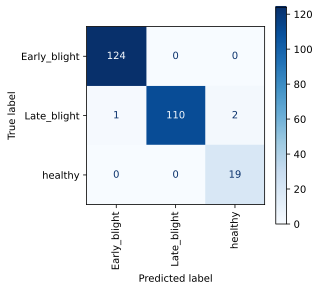

In [122]:
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax= ax)

In [124]:
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.97      0.99       113
           2       0.90      1.00      0.95        19

    accuracy                           0.99       256
   macro avg       0.97      0.99      0.98       256
weighted avg       0.99      0.99      0.99       256

